# EDA

In [34]:
#importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from IPython.display import display


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
df= pd.read_csv("Faculty_Database (1).csv", encoding = 'utf-8')
df.head()

,Faculty Name,Department,Gender,Designation,Ph.D. (Research Area),University /Institute,Country,Year of Completion,E-Mail,Telephone Number (off),Specialization/Interest,Specialization/Interest.1,Area of Expertise,No. of PhD Supervised / Guided (source: IIT-R Website),Sponsored Research Projects (Last Three Years; i.e. 2018-2021),Technology Transfer
0,Arindam Biswas,APD,M,Associate Professor,Urban Planning,University of Tokyo,Japan,2013.0,arindam.biswas@ar.iitr.ac.in,4785.0,"Urban and regional governance, Inclusive growt...",NaN,"Smart city development,practicing sustainable ...","04 awarded, 8 in Supervision","SPARC-MHRD, New Delhi: Urban and Regional Ineq...",NaN
1,Avlokita Agrawal,APD,F,Associate Professor,Energy Efficiency in Building through passive ...,IIT-Roorkee,India,2010.0,avlokita@ar.iitr.ac.in,4776.0,"Energy Efficiency in Buildings, Sustainability...",NaN,Analyzing land surface temperature trends usin...,Currently 8 in Supervision,"Indian Knowledge Systems Division AICTE, MOE: ...",NaN
2,Gaurav Raheja,APD,M,Professor,Enabling Environments for the Mobility Impaire...,IIT-Roorkee,India,2008.0,gaurav.raheja@ar.iitr.ac.in,5709.0,"Universal Design, Design for Disabled, Ageing ...",NaN,Accessibility Planning for Higher Education Ca...,9 in supervision,"Technical universitat Berlin, Germany: SMUS MO...",NaN
3,Harshit Sosan Lakra,APD,F,Assistant Professor,Architecture and Planning,IIT-Roorkee,India,2019.0,harshit.lakra@ar.iitr.ac.in,4775.0,Economic and Community Development,NaN,"Resilient Infrastructure, Green and blue infra...",NaN,Dr. Ramdayal Munda Tribal Welfare Research Ins...,NaN
4,Mahua Mukherjee,APD,F,Professor,Design Parameters for Human Settlements in a M...,"Jadavpur University, Kolkata",India,2003.0,mahua.mukherjee@ar.iitr.ac.in,5334.0,Architecture and Planning,NaN,"Building Information Modeling (BIM), Ecosystem...",5 in supervision,"NERC, Swindon: ENACT : Evaluating the feasibil...",NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
Faculty Name                                                       125 non-null object
Department                                                         125 non-null object
Gender                                                             125 non-null object
Designation                                                        125 non-null object
Ph.D.  (Research Area)                                             120 non-null object
University /Institute                                              120 non-null object
Country                                                            120 non-null object
Year of Completion                                                 120 non-null float64
E-Mail                                                             125 non-null object
Telephone Number (off)                                             121 non-null float64
Specialization/Interest

In [37]:
df.columns

Index(['Faculty Name ', 'Department ', 'Gender', 'Designation ',
       'Ph.D.  (Research Area)', 'University /Institute ', 'Country ',
       'Year of Completion ', 'E-Mail', 'Telephone Number (off)',
       'Specialization/Interest', 'Specialization/Interest.1',
       'Area of Expertise ',
       'No. of PhD Supervised / Guided (source: IIT-R Website) ',
       'Sponsored Research Projects  (Last Three Years; i.e. 2018-2021)',
       'Technology Transfer '],
      dtype='object')

In [38]:
print("Number of datapoints in dataset: {}".format(len(df)))

Number of datapoints in dataset: 125


### Department-wise division of the faculty

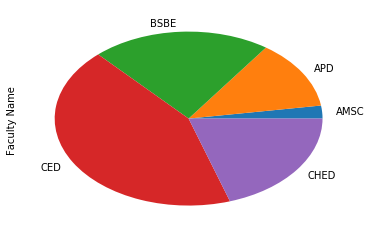

In [39]:
#plotting a pie plot to demonstrate
Department = df.groupby('Department ').count()['Faculty Name ']
Department.plot(kind='pie')

### Comparision between Designation of the professor and department-wise division

In [40]:
designation_list = df['Designation '].tolist()
x =  np.array(designation_list)
print(np.unique(x))

['Assistant Professor ' 'Associate Professor' 'HAG - Professor '
 'Professor ' 'Professor Emeritus ']


In [41]:
#departments in dataset
df = df[pd.notnull(df['Designation '])]
dept_list = df['Department '].tolist()
z =  np.array(dept_list)
print(np.unique(z))

['AMSC' 'APD' 'BSBE ' 'CED' 'CHED']


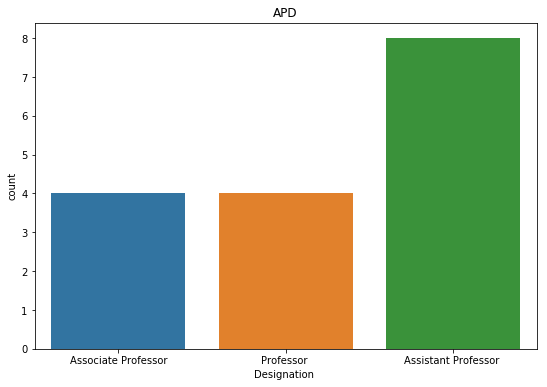

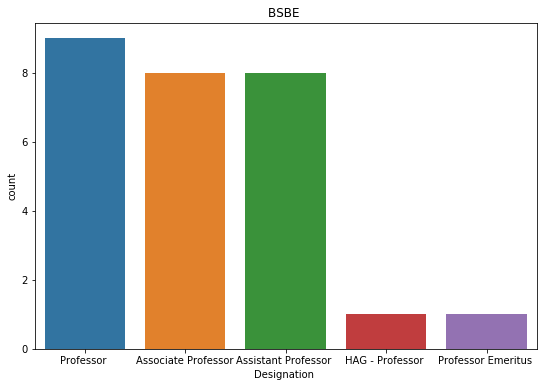

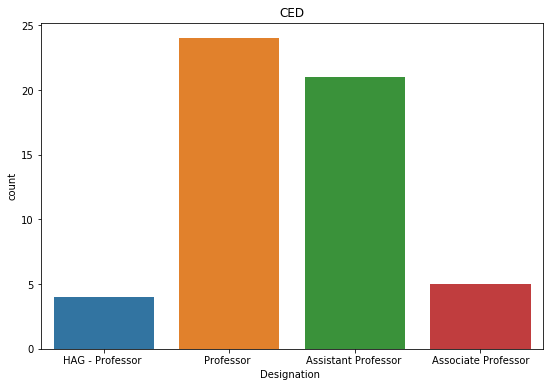

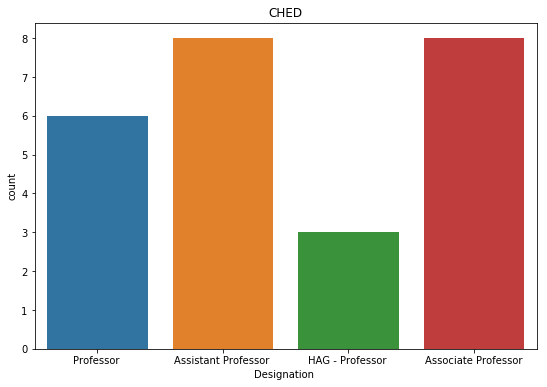

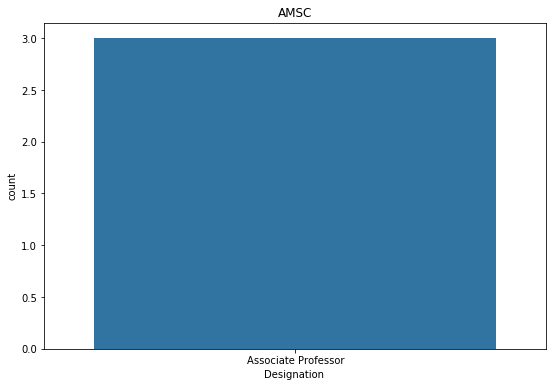

In [42]:
#bar-plot for each department showing designation distribution of the professors
gk = df.groupby('Department ')
def countplot(groups):
    for group in groups:
        plt.figure(figsize=(9, 6))
        plt.title(group)
        ax=sns.countplot(x = 'Designation ' , data = gk.get_group(group))
        plt.show()
countplot(['APD', 'BSBE ', 'CED', 'CHED', 'AMSC'])

Encoding designation column

In [43]:
enc_dict = {'Assistant Professor ': 1,
            'Associate Professor':2,
            'Professor ':3,
            'HAG - Professor ': 4,
            'Retired Faculty ' : 5,
            'Professor of Practice ': 6,
            'Professor Emeritus ' : 7}

In [44]:
df['Designation '] = df['Designation '].map(enc_dict)

Dropping irrelevant columns 

In [45]:
df.drop(['E-Mail','Telephone Number (off)'], axis=1, inplace= True)
df.head()

,Faculty Name,Department,Gender,Designation,Ph.D. (Research Area),University /Institute,Country,Year of Completion,Specialization/Interest,Specialization/Interest.1,Area of Expertise,No. of PhD Supervised / Guided (source: IIT-R Website),Sponsored Research Projects (Last Three Years; i.e. 2018-2021),Technology Transfer
0,Arindam Biswas,APD,M,2,Urban Planning,University of Tokyo,Japan,2013.0,"Urban and regional governance, Inclusive growt...",NaN,"Smart city development,practicing sustainable ...","04 awarded, 8 in Supervision","SPARC-MHRD, New Delhi: Urban and Regional Ineq...",NaN
1,Avlokita Agrawal,APD,F,2,Energy Efficiency in Building through passive ...,IIT-Roorkee,India,2010.0,"Energy Efficiency in Buildings, Sustainability...",NaN,Analyzing land surface temperature trends usin...,Currently 8 in Supervision,"Indian Knowledge Systems Division AICTE, MOE: ...",NaN
2,Gaurav Raheja,APD,M,3,Enabling Environments for the Mobility Impaire...,IIT-Roorkee,India,2008.0,"Universal Design, Design for Disabled, Ageing ...",NaN,Accessibility Planning for Higher Education Ca...,9 in supervision,"Technical universitat Berlin, Germany: SMUS MO...",NaN
3,Harshit Sosan Lakra,APD,F,1,Architecture and Planning,IIT-Roorkee,India,2019.0,Economic and Community Development,NaN,"Resilient Infrastructure, Green and blue infra...",NaN,Dr. Ramdayal Munda Tribal Welfare Research Ins...,NaN
4,Mahua Mukherjee,APD,F,3,Design Parameters for Human Settlements in a M...,"Jadavpur University, Kolkata",India,2003.0,Architecture and Planning,NaN,"Building Information Modeling (BIM), Ecosystem...",5 in supervision,"NERC, Swindon: ENACT : Evaluating the feasibil...",NaN


### Gender distribution among the faculty

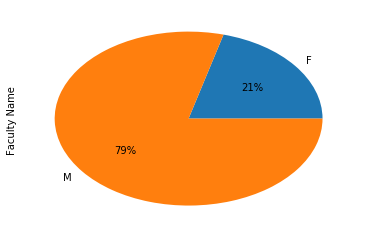

In [46]:
gender= df.groupby('Gender').count()['Faculty Name ']
gender.plot(kind='pie',autopct='%1.0f%%')

### Categorising the 'Year of graduation' of Professors followed by a graphical analysis

In [47]:
#separating them into 5-year periods 
df["Year of Completion "] = df["Year of Completion "].map(lambda x: x - (x%5))
df["Year of Completion "].unique()

array([2010., 2005., 2015., 2000., 2020.,   nan, 1990., 1995., 1980.])

In [48]:
#updated 'Year of Completion' column
df.head()

,Faculty Name,Department,Gender,Designation,Ph.D. (Research Area),University /Institute,Country,Year of Completion,Specialization/Interest,Specialization/Interest.1,Area of Expertise,No. of PhD Supervised / Guided (source: IIT-R Website),Sponsored Research Projects (Last Three Years; i.e. 2018-2021),Technology Transfer
0,Arindam Biswas,APD,M,2,Urban Planning,University of Tokyo,Japan,2010.0,"Urban and regional governance, Inclusive growt...",NaN,"Smart city development,practicing sustainable ...","04 awarded, 8 in Supervision","SPARC-MHRD, New Delhi: Urban and Regional Ineq...",NaN
1,Avlokita Agrawal,APD,F,2,Energy Efficiency in Building through passive ...,IIT-Roorkee,India,2010.0,"Energy Efficiency in Buildings, Sustainability...",NaN,Analyzing land surface temperature trends usin...,Currently 8 in Supervision,"Indian Knowledge Systems Division AICTE, MOE: ...",NaN
2,Gaurav Raheja,APD,M,3,Enabling Environments for the Mobility Impaire...,IIT-Roorkee,India,2005.0,"Universal Design, Design for Disabled, Ageing ...",NaN,Accessibility Planning for Higher Education Ca...,9 in supervision,"Technical universitat Berlin, Germany: SMUS MO...",NaN
3,Harshit Sosan Lakra,APD,F,1,Architecture and Planning,IIT-Roorkee,India,2015.0,Economic and Community Development,NaN,"Resilient Infrastructure, Green and blue infra...",NaN,Dr. Ramdayal Munda Tribal Welfare Research Ins...,NaN
4,Mahua Mukherjee,APD,F,3,Design Parameters for Human Settlements in a M...,"Jadavpur University, Kolkata",India,2000.0,Architecture and Planning,NaN,"Building Information Modeling (BIM), Ecosystem...",5 in supervision,"NERC, Swindon: ENACT : Evaluating the feasibil...",NaN


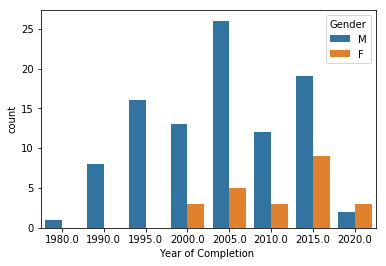

In [49]:
#countplot representing the number of profs who graduated between the specified year categories 
#and comparing them gender-wise
sns.countplot(data=df, x="Year of Completion ", hue="Gender")

### Country-wise distribution of professors

In [57]:
df["Country "]

0            Japan
1           India 
2           India 
3           India 
4           India 
5           India 
6           India 
7           India 
8              UK 
9              NaN
10           India
11           India
12           India
13             NaN
14           India
15           India
16           India
17             NaN
18           India
19           India
20           India
21           India
22             USA
23           India
24           India
25           India
26       Australia
27           India
28             NaN
29           India
          ...     
95         Germany
96           India
97             USA
98           India
99           India
100          India
101            USA
102     Singapore 
103          India
104        Canada 
105          India
106          India
107          India
108     Singapore 
109            USA
110          India
111          India
112          India
113          India
114          India
115            USA
116         

In [58]:
#code for EDA of the dataset 
def country_smoother(x):
    y = str(x)
    y = y.strip()
    # for UK I need to introduce new measures as U.K.
    if re.search("U.K.",y):
        y = "UK"
    if re.search("U.S.A.",y):
        y = "USA"
    return y

In [60]:
df_tech

,Faculty Name,Department,Gender,Designation,Ph.D. (Research Area),University /Institute,Country,Year of Completion,Specialization/Interest,Specialization/Interest.1,Area of Expertise,No. of PhD Supervised / Guided (source: IIT-R Website),Sponsored Research Projects (Last Three Years; i.e. 2018-2021),Technology Transfer
0,Arindam Biswas,APD,M,2,Urban Planning,University of Tokyo,Japan,2010.0,"Urban and regional governance, Inclusive growt...",NaN,"Smart city development,practicing sustainable ...","04 awarded, 8 in Supervision","SPARC-MHRD, New Delhi: Urban and Regional Ineq...",0
1,Avlokita Agrawal,APD,F,2,Energy Efficiency in Building through passive ...,IIT-Roorkee,India,2010.0,"Energy Efficiency in Buildings, Sustainability...",NaN,Analyzing land surface temperature trends usin...,Currently 8 in Supervision,"Indian Knowledge Systems Division AICTE, MOE: ...",0
2,Gaurav Raheja,APD,M,3,Enabling Environments for the Mobility Impaire...,IIT-Roorkee,India,2005.0,"Universal Design, Design for Disabled, Ageing ...",NaN,Accessibility Planning for Higher Education Ca...,9 in supervision,"Technical universitat Berlin, Germany: SMUS MO...",0
3,Harshit Sosan Lakra,APD,F,1,Architecture and Planning,IIT-Roorkee,India,2015.0,Economic and Community Development,NaN,"Resilient Infrastructure, Green and blue infra...",NaN,Dr. Ramdayal Munda Tribal Welfare Research Ins...,0
4,Mahua Mukherjee,APD,F,3,Design Parameters for Human Settlements in a M...,"Jadavpur University, Kolkata",India,2000.0,Architecture and Planning,NaN,"Building Information Modeling (BIM), Ecosystem...",5 in supervision,"NERC, Swindon: ENACT : Evaluating the feasibil...",0
5,Manavvi Suneja,APD,F,1,Architecture and Planning,IIT-Roorkee,India,2020.0,"Restorative Landscapes, Environment - Behavior...",NaN,"urban climate,micro-climate model,outdoor the...",NaN,NaN,0
6,Prabhjot Singh Chani,APD,M,3,Embodied Energy Assessment,IIT-Roorkee,India,2000.0,"Embodied Energy, Embodied Energy in Housing, E...",NaN,Implication of building energy modeling (BEM) ...,6 in Supervision,"Alliance for an Energy Efficient Economy, (AEE...",0
7,E Rajasekar,APD,M,2,Thermal comfort,IIT-Madras,India,2010.0,"Thermal comfort and human behaviour, Architect...",NaN,"Cold metal transfer (CMT) technology,Subjectiv...",NaN,"DST, New Delhi: Mission Innovation- Affordable...",0
8,Ram Sateesh Pasupuleti,APD,M,1,"Disasters, Vernacular Architecture, Development","University of Westminster, London",UK,2010.0,"Culturally Responsive Built Environments, Disa...",NaN,Designing Culturally Responsive built environm...,NaN,"ICSSR, New Delhi: An integrated framework for ...",0
9,Saptarshi Kolay,APD,M,1,NaN,NaN,NaN,NaN,"Visual Communication Design, User Experience D...",NaN,Study of Wayfinding Behaviours in an Outdoor E...,NaN,NaN,0


In [61]:
df_tech["Country "] = df_tech["Country "].apply(country_smoother)
df_tech

,Faculty Name,Department,Gender,Designation,Ph.D. (Research Area),University /Institute,Country,Year of Completion,Specialization/Interest,Specialization/Interest.1,Area of Expertise,No. of PhD Supervised / Guided (source: IIT-R Website),Sponsored Research Projects (Last Three Years; i.e. 2018-2021),Technology Transfer
0,Arindam Biswas,APD,M,2,Urban Planning,University of Tokyo,Japan,2010.0,"Urban and regional governance, Inclusive growt...",NaN,"Smart city development,practicing sustainable ...","04 awarded, 8 in Supervision","SPARC-MHRD, New Delhi: Urban and Regional Ineq...",0
1,Avlokita Agrawal,APD,F,2,Energy Efficiency in Building through passive ...,IIT-Roorkee,India,2010.0,"Energy Efficiency in Buildings, Sustainability...",NaN,Analyzing land surface temperature trends usin...,Currently 8 in Supervision,"Indian Knowledge Systems Division AICTE, MOE: ...",0
2,Gaurav Raheja,APD,M,3,Enabling Environments for the Mobility Impaire...,IIT-Roorkee,India,2005.0,"Universal Design, Design for Disabled, Ageing ...",NaN,Accessibility Planning for Higher Education Ca...,9 in supervision,"Technical universitat Berlin, Germany: SMUS MO...",0
3,Harshit Sosan Lakra,APD,F,1,Architecture and Planning,IIT-Roorkee,India,2015.0,Economic and Community Development,NaN,"Resilient Infrastructure, Green and blue infra...",NaN,Dr. Ramdayal Munda Tribal Welfare Research Ins...,0
4,Mahua Mukherjee,APD,F,3,Design Parameters for Human Settlements in a M...,"Jadavpur University, Kolkata",India,2000.0,Architecture and Planning,NaN,"Building Information Modeling (BIM), Ecosystem...",5 in supervision,"NERC, Swindon: ENACT : Evaluating the feasibil...",0
5,Manavvi Suneja,APD,F,1,Architecture and Planning,IIT-Roorkee,India,2020.0,"Restorative Landscapes, Environment - Behavior...",NaN,"urban climate,micro-climate model,outdoor the...",NaN,NaN,0
6,Prabhjot Singh Chani,APD,M,3,Embodied Energy Assessment,IIT-Roorkee,India,2000.0,"Embodied Energy, Embodied Energy in Housing, E...",NaN,Implication of building energy modeling (BEM) ...,6 in Supervision,"Alliance for an Energy Efficient Economy, (AEE...",0
7,E Rajasekar,APD,M,2,Thermal comfort,IIT-Madras,India,2010.0,"Thermal comfort and human behaviour, Architect...",NaN,"Cold metal transfer (CMT) technology,Subjectiv...",NaN,"DST, New Delhi: Mission Innovation- Affordable...",0
8,Ram Sateesh Pasupuleti,APD,M,1,"Disasters, Vernacular Architecture, Development","University of Westminster, London",UK,2010.0,"Culturally Responsive Built Environments, Disa...",NaN,Designing Culturally Responsive built environm...,NaN,"ICSSR, New Delhi: An integrated framework for ...",0
9,Saptarshi Kolay,APD,M,1,NaN,NaN,nan,NaN,"Visual Communication Design, User Experience D...",NaN,Study of Wayfinding Behaviours in an Outdoor E...,NaN,NaN,0


In [64]:
country= df_tech.groupby('Country ' ).count()['Faculty Name ']

In [65]:
country.pop("nan")

5

Bar plot showing the distribution

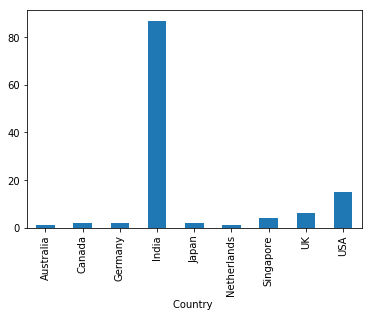

In [66]:
country.plot(kind='bar')

### Number of supervisers and awarded PhDs 

In [70]:
# Number of Supervisers and awareded phds
num_phds = np.array(df_tech["No. of PhD Supervised / Guided (source: IIT-R Website) "])
list(num_phds)

['04 awarded, 8 in Supervision',
 'Currently 8 in Supervision',
 '9 in supervision',
 nan,
 '5 in supervision',
 nan,
 '6 in Supervision',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '1 awarded',
 nan,
 '6 awarded',
 nan,
 nan,
 '12 Supervised / awarded',
 '4 awarded, 1 in supervision',
 '12 in Supervision',
 nan,
 nan,
 nan,
 '2 in supervision',
 '3 awarded',
 nan,
 nan,
 nan,
 '12 awarded, 8 in supervision',
 '4 awarded, 03 in supervision',
 nan,
 '19 awarded',
 nan,
 nan,
 '21 supervised',
 '09 awarded, 06 in supervision',
 '07 awarded, 09 in supervision ',
 nan,
 '06 awarded, 02 in supervision',
 '02 awarded',
 '01 awarded, 02 in supervision',
 nan,
 '02 awarded, 1 in supervision',
 nan,
 '11 awarded',
 '11 awarded',
 '4 in supervision ',
 '4 in supervision ',
 '5 in supervision',
 '6 in supervision ',
 '5 in supervision ',
 nan,
 nan,
 '9 awarded',
 '1 awarded',
 nan,
 '12 awarded',
 '02 in supervision',
 '55 awarded, 7 in supervision',
 '09 awarded, 15 in supervision',
 '1 awarded

In [71]:
number_of_phds_completed = 0
number_of_phds_progress = 0
for x in list(num_phds):
    y = re.findall("[0-9]+",x)
    if (len(y)>0):
        if len(y) == 1:
            print(y)
            number_of_phds_progress += int(y[0])
        elif len(y) == 2:
            print(y)
            number_of_phds_completed += int(y[0])
            number_of_phds_progress += int(y[1])

['04', '8']
['8']
['9']


TypeError: expected string or bytes-like object

### Analysing the 'Technology Transfer' column

In [52]:
df_tech = df["Technology Transfer "][df["Technology Transfer "].isnull() != True]

a = np.array(df_tech)
print(a)
#df_tech.to_numpy()

['Magnetic-field actuated hybrid nanofiber scaffold and apparatus for 4D tissue engineering, Patent Application Number with Date: 201711007507 Dt. 03.03.2017, Technology Transfer Partners: Two Individuals, Date:  10.11.2018'
 'A novel bioreactor system for solid-state fermentation and process of operation thereof, Patent Application Number with Date: 201611020038, dated 11.06.2016, Technology Transfer Partners: Fermentech Labs Pvt. Ltd, Date: 10.01.2022'
 'Bactericidal metal nanoparticles and their method of preparation, Patent Application Number with Date: 201811026558, Dt.17.07.2018,      Technology Transfer Partners: NSMR Private Limited, Date: 10.01.2022'
 'Technology Transfer to Noida-based company M/S Agarsar Innovaties LLP; The technology is the solution for making biodegradable polybags, LDPE which is used for packaging such as carry bags are non-biodegradable and LDPE bags were now banned in India since July 2022. This technology provides a solution to this problem in the form

In [53]:
import re
import numpy as np
def tech_transfer(x):
    if x == np.nan:
        return 0
    else:
        if x != "NIL":
            x = str(x)
            count = len(re.findall("Technology Transfer",x))
            return count
        else:
            return 0


In [55]:
df["Technology Transfer "] = df["Technology Transfer "].fillna(0)
df["Technology Transfer "] = df["Technology Transfer "].apply(tech_transfer, convert_dtype=str)

In [59]:
df_tech = df

In [56]:
df.describe()

,Designation,Year of Completion,Specialization/Interest.1,Technology Transfer
count,125.000000,120.000000,0.0,125.000000
mean,2.152000,2005.375000,NaN,0.032000
std,1.070544,8.554386,NaN,0.176708
min,1.000000,1980.000000,NaN,0.000000
25%,1.000000,2000.000000,NaN,0.000000
50%,2.000000,2005.000000,NaN,0.000000
75%,3.000000,2015.000000,NaN,0.000000
max,7.000000,2020.000000,NaN,1.000000
